In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os


: 

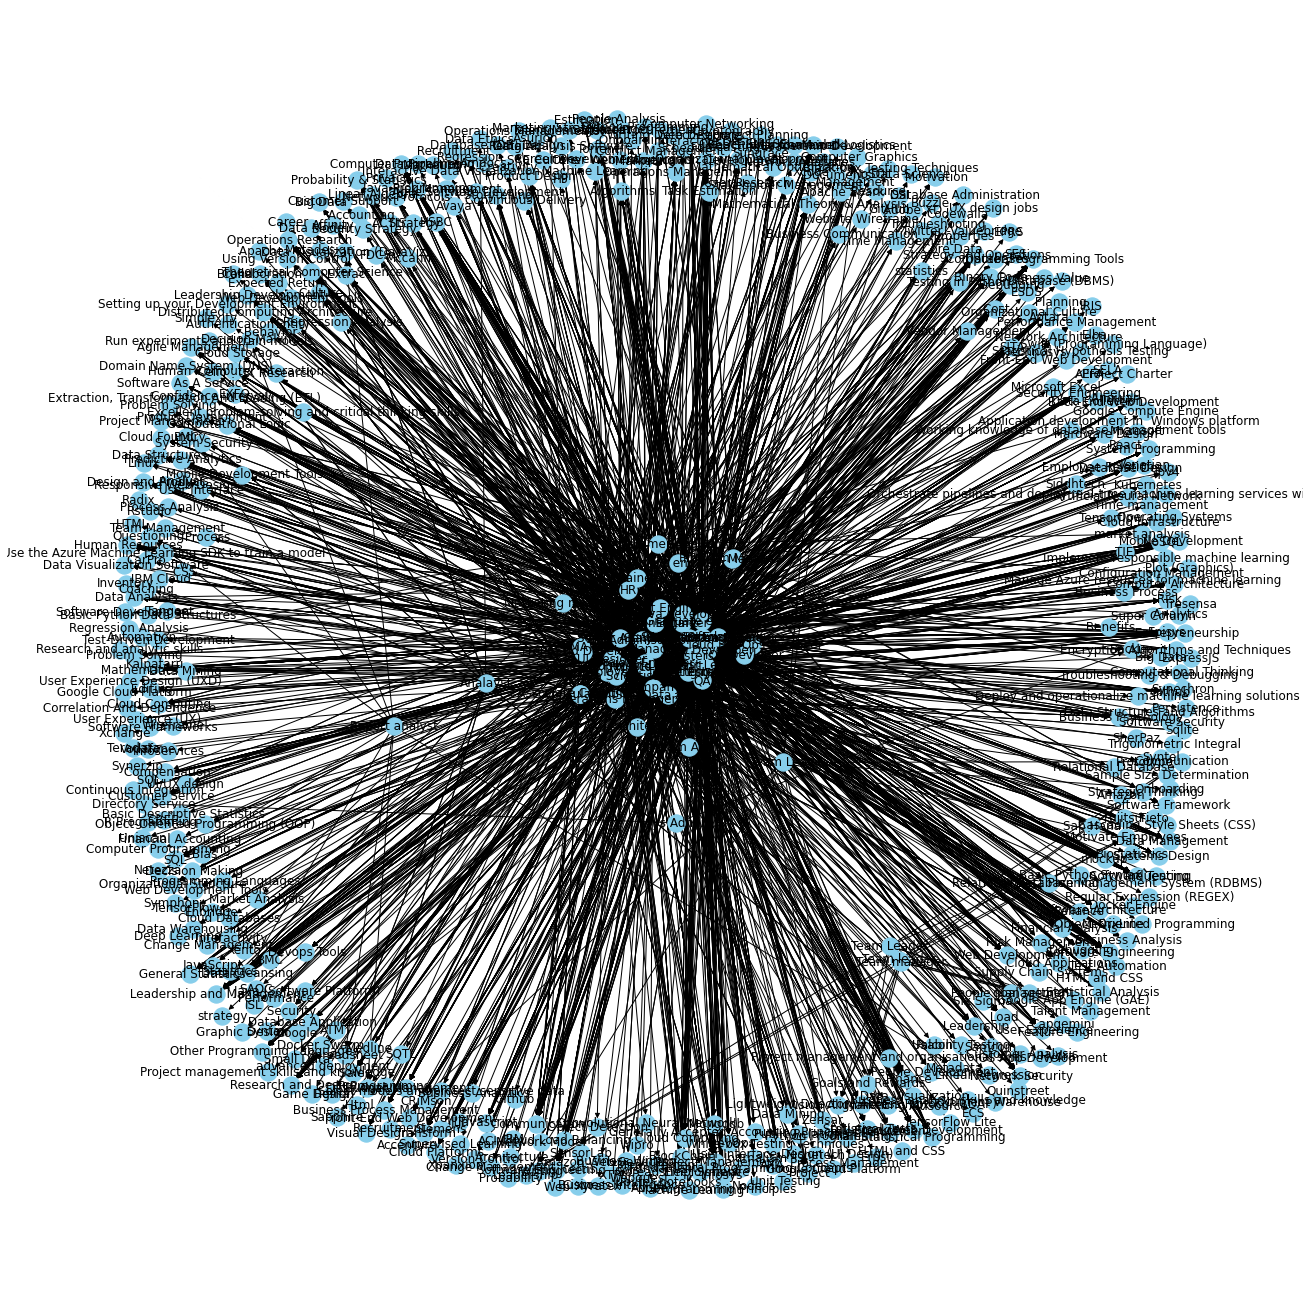

<Figure size 432x288 with 0 Axes>

In [64]:
def kg(filename):
    
    kg_df = pd.read_csv(filename)
    kg_df['Company'] = 'Company'
    kg_df.columns = ['Destination', 'Relation', '_', 'Source']
    kg_df.drop(columns = ['_'])

    kg_df = kg_df.head(100)
    df = pd.read_excel("temptable.xlsx", sheet_name='kg_table2')
    kg_df.append(df)
    kg_df = kg_df.append(df)
    
    kg_df.to_csv("final.csv")
    kg_df = pd.read_csv("final.csv")
    
    files= ['Designation_Hyponym.csv', 'Designation_abbrevation.csv', 'Designation_Hypernym.csv', 'Company_abbrevation.csv', 'Institute_abbrevation.csv', 'Designation_synonym.csv']

    df = pd.DataFrame(columns = ['Source', 'Destination', 'Relation'])
    for file in files:
        dfTemp = pd.read_csv(file)
        dfTemp  = dfTemp.drop(columns = ['Unnamed: 0'])
        dfTemp["Relation"] = 'Skill'
        dfTemp.columns = ['Source', 'Destination', 'Relation']
        df = df.append(dfTemp)
        
    kg_df.append(df)
    
    
    files1= ['Minningdata.xlsx']

    df1 = pd.DataFrame(columns = ['Source', 'Destination', 'Relation'])
    for file in files1:
        dfTemp1 = pd.read_excel(file)
        dfTemp1.columns = ['Source', 'Destination', 'Relation']
        df1 = df1.append(dfTemp1)
        
    kg_df.append(df1)

    
    
    
    G=nx.from_pandas_edgelist(kg_df, "Source", "Destination", 
                            edge_attr=True, create_using=nx.MultiDiGraph())

    plt.figure(figsize=(18,18))

    pos = nx.spring_layout(G)
    nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
    
#     nx.draw_networkx_edge_labels(G, pos=pos)
    
    plt.show()
    plt.savefig("plot.png", dpi=1000)

# kg("relation_tables.csv")
kg("relation_tables.csv")

In [58]:
kg_df = pd.read_excel("temptable.xlsx")
kg_df['Company'] = 'Company'
kg_df.columns = ['Destination', 'Relation', '_', 'Source']
kg_df = kg_df.drop(columns = ['_'])
df = pd.read_excel("temptable.xlsx", sheet_name='kg_table2')
kg_df = kg_df.append(df)
kg_df

,Destination,Relation,Source
0,Company,description,Company
1,Accenture,IT Services and IT Consulting,Company
2,ACI,Construction,Company
3,ACTIS,Financial Services,Company
4,Adobe,Software Development,Company
...,...,...,...
3049,Systems Design,Skill,Web Developer
3050,Theoretical Computer Science,Skill,Web Developer
3051,Web Design,Skill,Web Developer
3052,Web Development,Skill,Web Developer
